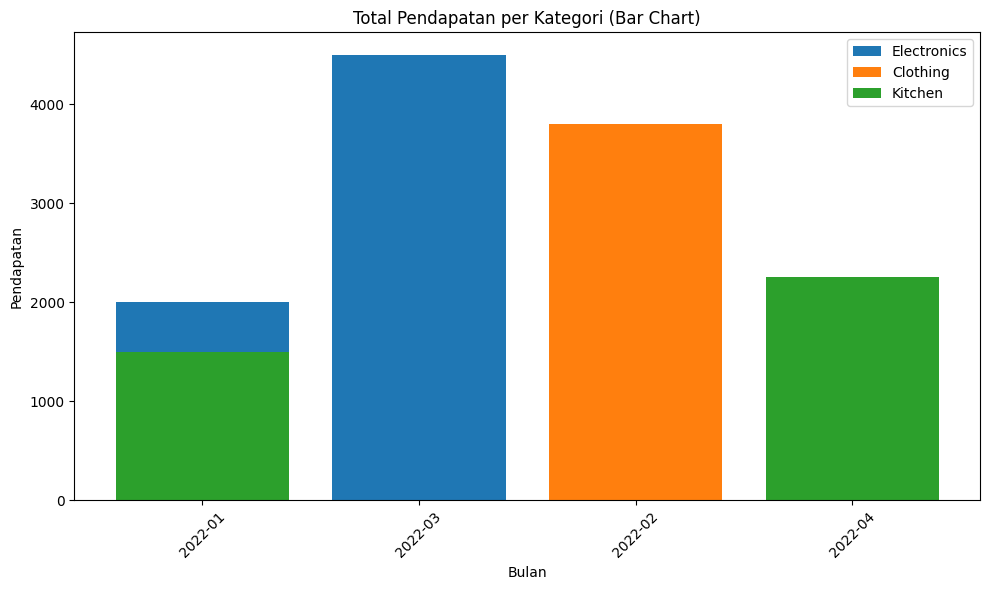

In [1]:
import pandas as pd  # Mengimpor library pandas untuk pengolahan data dalam bentuk tabel (DataFrame)
import matplotlib.pyplot as plt  # Mengimpor library matplotlib untuk membuat visualisasi data

# Data penjualan dalam bentuk dictionary
data = {
    'ProductID': ['P001', 'P002', 'P003', 'P004', 'P005', 'P006'],  # ID unik untuk setiap produk
    'ProductName': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F'],  # Nama produk
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Kitchen', 'Kitchen'],  # Kategori produk
    'Quantity': [10, 30, 20, 15, 25, 5],  # Jumlah produk yang terjual
    'Price': [200, 150, 100, 120, 90, 300],  # Harga produk per unit
    'Date': ['2022-01-10', '2022-03-11', '2022-02-10', '2022-02-12', '2022-04-13', '2022-01-14']  # Tanggal penjualan
}

# Mengonversi data ke DataFrame pandas untuk pengolahan yang lebih mudah
df = pd.DataFrame(data)

# Mengonversi kolom 'Date' menjadi tipe datetime agar bisa diolah berdasarkan tanggal
df['Date'] = pd.to_datetime(df['Date'])

# Menambahkan kolom 'Month' yang menyimpan informasi bulan dan tahun saja (tanpa tanggal)
df['Month'] = df['Date'].dt.strftime('%Y-%m')

# 1. Menghitung total pendapatan (Revenue) untuk setiap transaksi (Quantity x Price)
df['Revenue'] = df['Quantity'] * df['Price']

# Mengelompokkan data berdasarkan 'Category' dan 'Month', lalu menghitung total pendapatan untuk setiap grup
total_revenue = df.groupby(['Category', 'Month'])['Revenue'].sum().reset_index()

# 4. Membuat visualisasi total pendapatan per kategori menggunakan bar chart
plt.figure(figsize=(10, 6))  # Menentukan ukuran gambar plot

# Mendapatkan daftar kategori unik dari kolom 'Category'
categories = df['Category'].unique()

# Loop melalui setiap kategori untuk memplot bar chart
for category in categories:
    # Mengambil data pendapatan untuk kategori tertentu
    category_data = total_revenue[total_revenue['Category'] == category]
    # Memplot bar chart berdasarkan bulan dan pendapatan per kategori
    plt.bar(category_data['Month'], category_data['Revenue'], label=category)

# Menambahkan judul untuk grafik
plt.title('Total Pendapatan per Kategori (Bar Chart)')
# Menambahkan label untuk sumbu x
plt.xlabel('Bulan')
# Menambahkan label untuk sumbu y
plt.ylabel('Pendapatan')
# Memutar label pada sumbu x agar mudah dibaca
plt.xticks(rotation=45)
# Menambahkan legenda untuk setiap kategori
plt.legend()
# Menata layout agar grafik lebih rapi
plt.tight_layout()
# Menampilkan grafik
plt.show()
